In [13]:
library(ggplot2)
library(lubridate)
library(Scale)
library(reshape2)
library(tm)
library(SnowballC)
library(wordcloud)
library(RColorBrewer)
library(stringr)
library(syuzhet)
library(dplyr)

library(tidytext)
library(hunspell)
library(tidyverse)
library(fivethirtyeight)
library(gridExtra)

# Loading the chats as .txt file

In [2]:
text = readLines("../input/chatdatas/Chat.txt")

# Correct Corpus - break the text for each sentence

In [3]:
docs = Corpus(VectorSource(text))

# Cleaning the data

In [4]:
trans = content_transformer(function(x,pattern) gsub(pattern," ",x))
docs = tm_map(docs,trans,"/")
docs = tm_map(docs,trans,"@")
docs = tm_map(docs,trans,"\\|")
docs = tm_map(docs,content_transformer(tolower))
docs = tm_map(docs,removeNumbers)
docs = tm_map(docs,removeWords,stopwords("en"))
docs = tm_map(docs,removePunctuation)
docs = tm_map(docs,stripWhitespace)
docs = tm_map(docs,stemDocument)
docs = tm_map(docs,trans,"https")

Warning message in tm_map.SimpleCorpus(docs, trans, "/"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, trans, "@"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, trans, "\\|"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("en")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, stemDocument):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, trans, "https"):
“transformation drops documents”


# Create the Document Term Matrix

In [5]:
dtm = TermDocumentMatrix(docs)
mat = as.matrix(dtm)
v = sort(rowSums(mat), decreasing = T)

# Create a dataframe with unique words with their frequencies in the chats

In [6]:
data = data.frame(word = names(v), freq = v)
head(data, 10)

,word,freq
,<fct>,<dbl>
bilal,bilal,481
hungund,hungund,469
bro,bro,458
vikraant,vikraant,447
nmim,nmim,447
mayur,mayur,427
hai,hai,322
ushardev,ushardev,286
media,media,235


# Generate the wordcloud

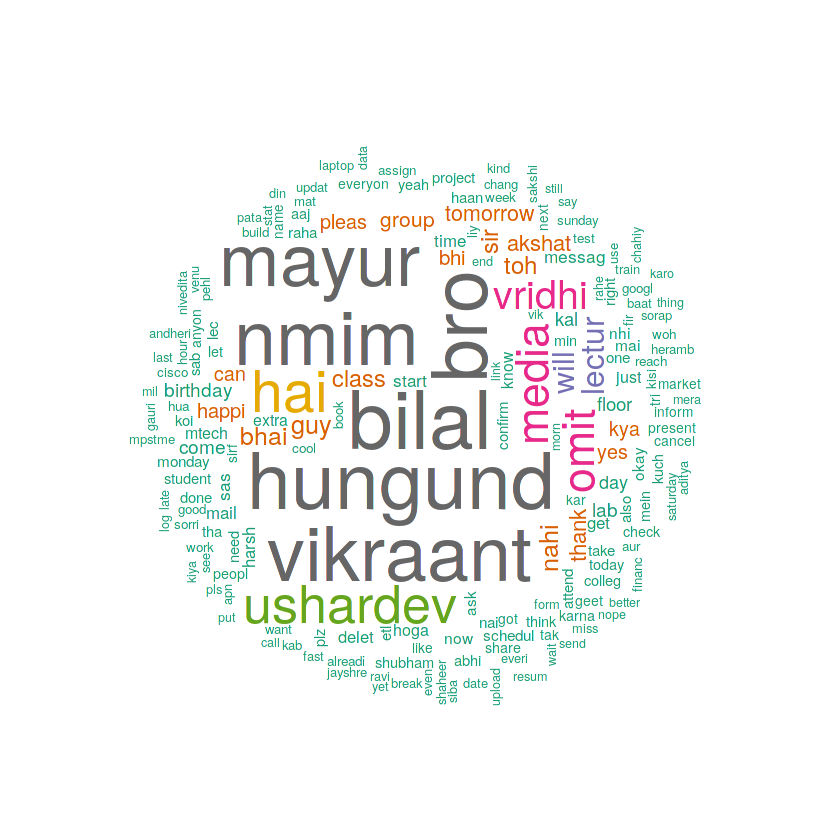

In [7]:
set.seed(1056)
wordcloud(words = data$word,
          freq = data$freq,min.freq=1,
          max.words = 200,
          random.order = F,
          rot.per = 0.35,
          colors = brewer.pal(8,"Dark2"))

# Creating a Sentimental analysis, segregating chats into labels such as anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, and trust

In [8]:
Sentiment = get_nrc_sentiment(text)
head(Sentiment, 10)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,1,0,1,1,0,1
7,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,1,0,1,1,0,1


In [9]:
text = cbind(text, Sentiment)

# Count the sentiment words by category

In [10]:
TotalSentiment = data.frame(colSums(text[,c(2:11)]))

In [11]:
names(TotalSentiment) = "Count"
TotalSentiment = cbind("Sentiment" = rownames(TotalSentiment), TotalSentiment)
rownames(TotalSentiment) = NULL

# Plot a graph, with count of labels for each chats

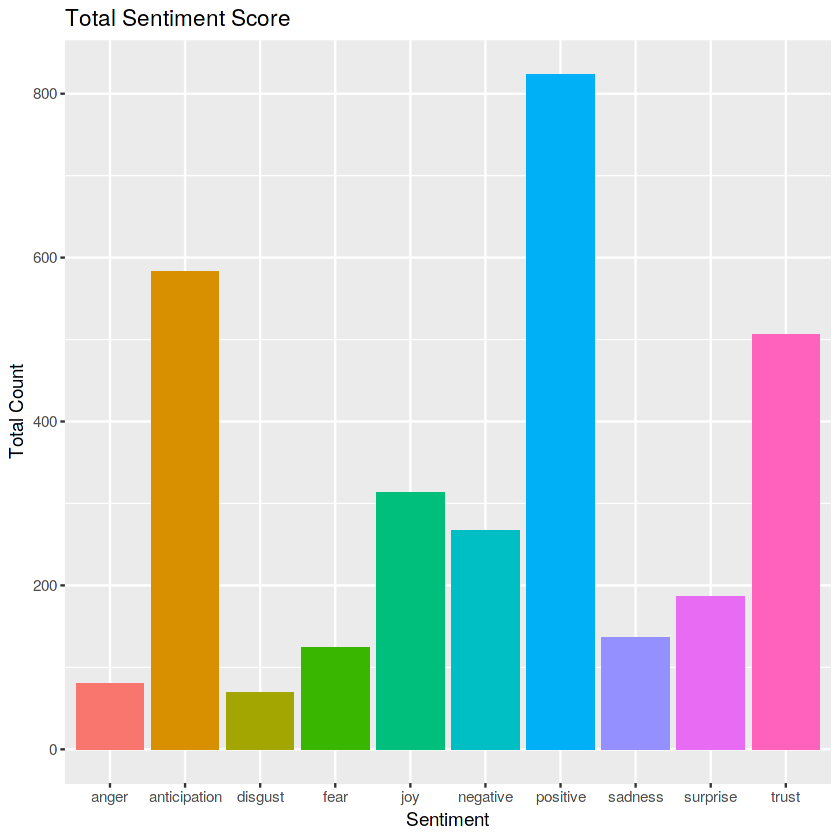

In [12]:
ggplot(data = TotalSentiment,aes(x = Sentiment, y = Count)) + 
    geom_bar(aes(fill = Sentiment), stat = "identity") + 
    theme(legend.position = "none") + 
    xlab("Sentiment") + 
    ylab("Total Count") + 
    ggtitle("Total Sentiment Score")